# This python notebook was downloaded from: 
### [nanoHub](https://proxy.nanohub.org/weber/1808541/4pkNOWVH2Wm2s9Sm/4/notebooks/MSE_Machine_Learning_Tutorials.ipynb?)

## *Using neural networks to predict and classify crystal structures of elements*


**Outline:**

1. Getting a dataset
2. Processing and Organizing Data
3. Creating the Model
4. Plotting

### 1. Getting a dataset

Datasets containing properties for the elements in the periodic table are available online; however, it would be thematic to create our own, using the tools from the first tutorial on [MSEML Query_Viz](MSEML_Query_Viz.ipynb). In this section we will query both [Pymatgen](http://pymatgen.org/) and [Mendeleev](https://mendeleev.readthedocs.io/en/stable/) to get a complete set of properties per element. We will use this data to create the cases from which the model will train and test.
<br>
<br>
In this first snippet of code we will import all relevant libraries, the elements that will be turned into cases and the properties that will serve as the attributes for the cases. We will get 47 entries (which is a small dataset), but should give us a somewhat accurate prediction. It is important to note that more entries would move the prediction closer to the real value, and so would more attributes.
<br>
<br>
The elements listed were chosen because querying them for these properties yields a dataset with no unknown values, and because they represent the three most common crystallographic structures.

In [1]:
! pip install pymatgen

                                              0.0/7.7 MB ? eta -:--:--
     -                                        0.3/7.7 MB 20.5 MB/s eta 0:00:01
     ----                                     0.8/7.7 MB 10.2 MB/s eta 0:00:01
     ------                                   1.3/7.7 MB 10.0 MB/s eta 0:00:01
     --------                                 1.7/7.7 MB 9.9 MB/s eta 0:00:01
     ----------                               2.0/7.7 MB 9.7 MB/s eta 0:00:01
     ------------                             2.5/7.7 MB 9.3 MB/s eta 0:00:01
     --------------                           2.9/7.7 MB 9.2 MB/s eta 0:00:01
     ----------------                         3.1/7.7 MB 8.6 MB/s eta 0:00:01
     ------------------                       3.6/7.7 MB 8.9 MB/s eta 0:00:01
     --------------------                     3.9/7.7 MB 8.5 MB/s eta 0:00:01
     ----------------------                   4.3/7.7 MB 8.4 MB/s eta 0:00:01
     -------------------------                4.9/7.7 MB 8.6 MB/s et

In [2]:
! pip install mendeleev

                                              0.0/353.1 kB ? eta -:--:--
     ------------------------------------- 353.1/353.1 kB 21.4 MB/s eta 0:00:00
                                              0.0/2.1 MB ? eta -:--:--
     ------------                             0.7/2.1 MB 13.7 MB/s eta 0:00:01
     ---------------------                    1.1/2.1 MB 14.3 MB/s eta 0:00:01
     -----------------------------            1.5/2.1 MB 12.0 MB/s eta 0:00:01
     -------------------------------------    2.0/2.1 MB 11.3 MB/s eta 0:00:01
     ---------------------------------------- 2.1/2.1 MB 8.8 MB/s eta 0:00:00
                                              0.0/865.8 kB ? eta -:--:--
     -------                                174.1/865.8 kB 5.3 MB/s eta 0:00:01
     -------------------                    450.6/865.8 kB 5.6 MB/s eta 0:00:01
     -------------------------------        706.6/865.8 kB 5.6 MB/s eta 0:00:01
     -------------------------------------  860.2/865.8 kB 5.0 MB/s e

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.10.0 requires protobuf<3.20,>=3.9.2, but you have protobuf 4.23.4 which is incompatible.


In [5]:
! pip install protobuf==3.20.*

                                              0.0/904.0 kB ? eta -:--:--
     -------------                         337.9/904.0 kB 10.6 MB/s eta 0:00:01
     -------------------------------------  901.1/904.0 kB 9.6 MB/s eta 0:00:01
     -------------------------------------- 904.0/904.0 kB 7.2 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 4.23.4
    Uninstalling protobuf-4.23.4:
      Successfully uninstalled protobuf-4.23.4


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\Shiv\\anaconda3\\envs\\tf-keras\\Lib\\site-packages\\google\\~upb\\_message.pyd'
Consider using the `--user` option or check the permissions.



In [6]:
import tensorflow as tf
from tensorflow import keras
from keras import initializers
from keras.layers import Dense
from keras.models import Sequential

import pymatgen.core as pymat
import mendeleev as mendel
import pandas as pd
import numpy as np
import random

%matplotlib inline
import matplotlib.pyplot as plt
import sys

fcc_elements = ["Ag", "Al", "Au", "Cu", "Ir", "Ni", "Pb", "Pd", "Pt", "Rh", "Th", "Yb"]
bcc_elements = ["Ba", "Ca", "Cr", "Cs", "Eu", "Fe", "Li", "Mn", "Mo", "Na", "Nb", "Rb", "Ta", "V", "W" ]
hcp_elements = ["Be", "Cd", "Co", "Dy", "Er", "Gd", "Hf", "Ho", "Lu", "Mg", "Re", 
                "Ru", "Sc", "Tb", "Ti", "Tl", "Tm", "Y", "Zn", "Zr"]

elements = fcc_elements + bcc_elements + hcp_elements

random.Random(1).shuffle(elements)

#Note that different properties have been added from the two databases.
querable_mendeleev = ["atomic_number", "atomic_volume", "boiling_point", "en_ghosh",  "evaporation_heat", "heat_of_formation",
                     "lattice_constant", "melting_point", "specific_heat"]
querable_pymatgen = ["atomic_mass", "atomic_radius", "electrical_resistivity","molar_volume", "bulk_modulus", "youngs_modulus",
                     "average_ionic_radius", "density_of_solid", "coefficient_of_linear_thermal_expansion"]
querable_values = querable_mendeleev + querable_pymatgen

TypeError: Descriptors cannot be created directly.
If this call came from a _pb2.py file, your generated code is out of date and must be regenerated with protoc >= 3.19.0.
If you cannot immediately regenerate your protos, some other possible workarounds are:
 1. Downgrade the protobuf package to 3.20.x or lower.
 2. Set PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION=python (but this will use pure-Python parsing and will be much slower).

More information: https://developers.google.com/protocol-buffers/docs/news/2022-05-06#python-updates

As before, we will use the database queries to populate lists which can be displayed by the [Pandas](https://pandas.pydata.org/) library in a user-friendly table with the properties as the column headers.

In [ ]:
all_values = [] # Values for Attributes
all_labels = [] # Crystal structure labels (0 = fcc, 1 = bcc, 2 = hcp)

for item in elements:
    element_values = []
    
    # This section queries Mendeleev
    element_object = mendel.element(item)
    for i in querable_mendeleev:    
        element_values.append(getattr(element_object,i))

    # This section queries Pymatgen
    element_object = pymat.Element(item)    
    for i in querable_pymatgen:
        element_values.append(getattr(element_object,i))
        
    all_values.append(element_values) # All lists are appended to another list, creating a List of Lists
    
    if (item in fcc_elements):
        all_labels.append([1, 0, 0]) # The crystal structure labels are assigned here
    elif (item in bcc_elements):
        all_labels.append([0, 1, 0]) # The crystal structure labels are assigned here
    elif (item in hcp_elements):
        all_labels.append([0, 0, 1]) # The crystal structure labels are assigned here

#print("What is inside element_values")
#print(element_values)
#print("What is inside all_labels")
#print(all_labels)

# Pandas Dataframe
df = pd.DataFrame(all_values, columns=querable_values)

# We will patch some of the values that are not available in the datasets.

# Value for the CTE of Cesium
index_Cs = df.index[df['atomic_number'] == 55]
df.iloc[index_Cs, df.columns.get_loc("coefficient_of_linear_thermal_expansion")] = 0.000097 
# Value from: David R. Lide (ed), CRC Handbook of Chemistry and Physics, 84th Edition. CRC Press. Boca Raton, Florida, 2003

# Value for the CTE of Rubidium
index_Rb = df.index[df['atomic_number'] == 37]
df.iloc[index_Rb, df.columns.get_loc("coefficient_of_linear_thermal_expansion")] = 0.000090 
# Value from: https://www.azom.com/article.aspx?ArticleID=1834

# Value for the Evaporation Heat of Ruthenium
index_Ru = df.index[df['atomic_number'] == 44]
df.iloc[index_Ru, df.columns.get_loc("evaporation_heat")] = 595 # kJ/mol 
# Value from: https://www.webelements.com/ruthenium/thermochemistry.html

# Value for the Bulk Modulus of Zirconium
index_Zr = df.index[df['atomic_number'] == 40]
df.iloc[index_Zr, df.columns.get_loc("bulk_modulus")] = 94 # GPa 
# Value from: https://materialsproject.org/materials/mp-131/

df.head

### 2. Processing and Organizing Data

We again normalize the data and organize it into training and testing sets as before.

##### SETS

We have 47 elements for which the crystal structure is known and we will use 40 of these as a training set and the remaining 7 as testing set.

##### NORMALIZATION

We will again use the Standard Score Normalization, which subtracts the mean of the feature and divide by its standard deviation.

<span style="font-size:2em;">$ \frac{X - µ}{σ} $ </span>

While our model might converge without feature normalization, the resultant model would be difficult to train and would be dependent on the choice of units used in the input.

In [ ]:
# SETS

all_values = [list(df.iloc[x]) for x in range(len(all_values))]

# List of lists are turned into Numpy arrays to facilitate calculations in steps to follow (Normalization).
all_values = np.array(all_values, dtype = float)
print("Shape of Values:", all_values.shape)
all_labels = np.array(all_labels, dtype = int)
print("Shape of Labels:", all_labels.shape)

# Training Set
train_values = all_values[:40, :]
train_labels = all_labels[:40, :]

# Testing Set
test_values = all_values[-7:, :]
test_labels = all_labels[-7:, :]

# NORMALIZATION

mean = np.nanmean(train_values, axis = 0) # mean, np.nanmean is a version of mean function in numpy that throws errors if all slices of data are NaN.

std = np.nanstd(train_values, axis = 0) # standard deviation

train_values = (train_values - mean) / std # input scaling
test_values = (test_values - mean) / std # input scaling

print(train_values[0]) # print a sample entry from the training set
#print(train_labels[0])

### 3. Creating the Model

For this classification, we will use a simple sequential neural network with one densely connected hidden layer. We will try many optimizers.

To learn more about Root Mean Squared Propagation, click [here](https://climin.readthedocs.io/en/latest/rmsprop.html).



The key difference between the regression model and the classification model is our metric to measure network performance. While we used mean squared error (between the true outputs and the network's predicted output) for the regression task, we use categorical cross entropy (click [here](https://towardsdatascience.com/demystifying-cross-entropy-e80e3ad54a8) to learn more about it), using classification accuracy as a metric where higher accuracy implies a better network.

In [ ]:
from tensorflow.keras import optimizers
# DEFINITION OF THE MODEL

# The weights of our neural network will be initialized in a random manner, using a seed allows for reproducibility
kernel_init = initializers.RandomNormal(seed=14)

model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(train_values.shape[1],), kernel_initializer=kernel_init))
#model.add(Dense(16, activation='relu', kernel_initializer=kernel_init))
model.add(Dense(3, activation=tf.nn.softmax))  # Output Layer

# DEFINITION OF THE OPTIMIZER

#optimizer = optimizers.RMSprop(0.002) # AdaM Optimizer. 0.002 is the learning rate.
#optimizer = optimizers.Adam(0.002) # AdaM Optimizer. 0.002 is the learning rate.
optimizer = optimizers.SGD(0.002) # AdaM Optimizer. 0.002 is the learning rate.

# This line matches the optimizer to the model and states which metrics will evaluate the model's accuracy
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
model.summary()

#### TRAINING 

This model is trained for 500 epochs, and we record the training accuracy in the history object. This way, by plotting "history" we can see the evolution of the "learning" of the model, that is the decrease of the Mean Absolute Error. Models in Keras are fitted to the training set using the [**fit**](https://keras.io/models/model/#fit) method.

One **Epoch** occurs when you pass the entire dataset through the model. One **Batch** contains a subset of the dataset that can be fed to the model at the same time. A more detailed explanation of these concepts can be found in this [blog](https://towardsdatascience.com/epoch-vs-iterations-vs-batch-size-4dfb9c7ce9c9). As we have a really small dataset compared to the ones that are usually considered to be modeled by these neural networks, we are feeding all entries at the same time, so our batch is the entire dataset, and an epoch occurs when the batch is processed.

1/1 [==============================] - 0s 22ms/step - loss: 2.4239e-04 - accuracy: 1.0000 - val_loss: 0.0032 - val_accuracy: 1.0000
Epoch 463/500
1/1 [==============================] - 0s 23ms/step - loss: 2.3497e-04 - accuracy: 1.0000 - val_loss: 0.0030 - val_accuracy: 1.0000
Epoch 464/500
1/1 [==============================] - 0s 22ms/step - loss: 2.2777e-04 - accuracy: 1.0000 - val_loss: 0.0031 - val_accuracy: 1.0000
Epoch 465/500
1/1 [==============================] - 0s 22ms/step - loss: 2.2117e-04 - accuracy: 1.0000 - val_loss: 0.0031 - val_accuracy: 1.0000
Epoch 466/500
1/1 [==============================] - 0s 23ms/step - loss: 2.1538e-04 - accuracy: 1.0000 - val_loss: 0.0031 - val_accuracy: 1.0000
Epoch 467/500
1/1 [==============================] - 0s 22ms/step - loss: 2.0969e-04 - accuracy: 1.0000 - val_loss: 0.0031 - val_accuracy: 1.0000
Epoch 468/500
1/1 [==============================] - 0s 22ms/step - loss: 2.0388e-04 - accuracy: 1.0000 - val_loss: 0.0031 - val_accuracy:

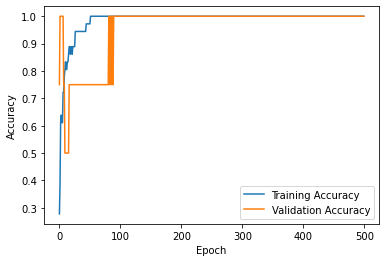

In [ ]:
class PrintEpNum(keras.callbacks.Callback): # This is a function for the Epoch Counter
    def on_epoch_end(self, epoch, logs):
        sys.stdout.flush()
        sys.stdout.write("Current Epoch: " + str(epoch+1) + '\r') # Updates current Epoch Number


EPOCHS = 500 # Number of EPOCHS

# HISTORY Object which contains how the model learned
history = model.fit(train_values, train_labels, batch_size=train_values.shape[0], \
                    epochs=EPOCHS, validation_split=0.1, verbose = True, callbacks=[PrintEpNum()])

# PLOTTING HISTORY USING MATPLOTLIB

plt.figure()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
#plt.ylim(0.98,1.05)
plt.plot(history.epoch, np.array(history.history['accuracy']),label='Training Accuracy')
plt.plot(history.epoch, np.array(history.history['val_accuracy']),label = 'Validation Accuracy')
plt.legend()
plt.show()

#### TESTING

Models in Keras are tested using the method [**evaluate**](https://keras.io/models/model/#evaluate). This method returns the classification accuracy on the training and the testing sets.

In [ ]:
loss, acc = model.evaluate(train_values, train_labels, verbose=1)

print("Training Set Accuracy: %f" %(acc))

loss, acc = model.evaluate(test_values, test_labels, verbose=1)

print("Testing Set Accuracy: %f" %(acc))

#### MAKING PREDICTIONS

The last step in a Regression Model is to make predictions for values not in the training set, which are determined by the method [**predict**](https://keras.io/models/model/#predict). In the following cell we print the Elements in the testing set, the real values for their Young's Moduli and the predictions generated by the Machine Learning model.

In [ ]:
train_predictions = model.predict(train_values)
test_predictions = model.predict(test_values)

all_labels = np.vstack((train_labels, test_labels))
all_predictions = np.vstack((train_predictions, test_predictions))

predicted_labels = []
true_labels = []

for i in range(all_predictions.shape[0]):
    if (np.argmax(all_predictions[i]) == 0): # np.argmax returns the index of maximum value along an axis.
        # Here we are looking for the value 
        predicted_labels.append("FCC")
    if (np.argmax(all_labels[i]) == 0):
        true_labels.append("FCC")
    if (np.argmax(all_predictions[i]) == 1):
        predicted_labels.append("BCC")
    if (np.argmax(all_labels[i]) == 1):
        true_labels.append("BCC")
    if (np.argmax(all_predictions[i]) == 2):
        predicted_labels.append("HCP")
    if (np.argmax(all_labels[i]) == 2):
        true_labels.append("HCP")

predicted_labels = np.array(predicted_labels).reshape((-1, 1))
true_labels = np.array(true_labels).reshape((-1, 1))
headings = ["Atomic number", "True crystal structure", "Predicted crystal structure"]

atomic_number_array = np.array(df.iloc[:, 0]).reshape((-1, 1))
plot_table = np.concatenate((atomic_number_array, true_labels, predicted_labels), axis=1)

plot_df = pd.DataFrame(plot_table, columns=headings)

In [ ]:
plot_df

In [ ]:
crystal_structures = ["FCC", "BCC", "HCP"]
FCC_prediction = []
BCC_prediction = []
HCP_prediction = []

for item in range(len(all_predictions)):
    FCC_prediction.append(all_predictions[item].tolist()[0])
    BCC_prediction.append(all_predictions[item].tolist()[1])
    HCP_prediction.append(all_predictions[item].tolist()[2])   

# --------------------------------------------------------------
    
# This block will be used to sort the elements by their atomic number
    
atomic_number = list(df.iloc[:, 0]) # From the Pandas Dataset
order = np.argsort(atomic_number) # Sorting Indexes

# Sorting the lists by the indexes
# elements = [elements[x] for x in order]
# FCC_prediction = [FCC_prediction[x] for x in order]
# BCC_prediction = [BCC_prediction[x] for x in order]
# HCP_prediction =[HCP_prediction[x] for x in order]

# # --------------------------------------------------------------

In [ ]:
import plotly as py
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from plotly.offline import iplot

py.offline.init_notebook_mode(connected=True)

fig = make_subplots(rows=3, cols=1, vertical_spacing=0.2)

# ---------
fig.append_trace(go.Bar(x=[_ for _ in elements if _ in fcc_elements], y=[FCC_prediction[_] for _ in range(len(FCC_prediction)) if elements[_] in fcc_elements], name='FCC', marker=dict(color='green'), showlegend=False, textposition='inside', textfont={"size":24},
                        text=['*'  if _ in elements[-7:] else None for _ in [_ for _ in elements if _ in fcc_elements]]), row=1, col=1)

fig.append_trace(go.Bar(x=[_ for _ in elements if _ in fcc_elements], y=[BCC_prediction[_] for _ in range(len(BCC_prediction)) if elements[_] in fcc_elements], name='BCC', marker=dict(color='red'), showlegend=False), row=1, col=1)
fig.append_trace(go.Bar(x=[_ for _ in elements if _ in fcc_elements], y=[HCP_prediction[_] for _ in range(len(HCP_prediction)) if elements[_] in fcc_elements], name='HCP', marker=dict(color='red'), showlegend=False), row=1, col=1) 
# ---------

# ---------

fig.append_trace(go.Bar(x=[_ for _ in elements if _ in bcc_elements], y=[FCC_prediction[_] for _ in range(len(FCC_prediction)) if elements[_] in bcc_elements], name='FCC', marker=dict(color='red'), showlegend=False), row=2, col=1)
fig.append_trace(go.Bar(x=[_ for _ in elements if _ in bcc_elements], y=[BCC_prediction[_] for _ in range(len(BCC_prediction)) if elements[_] in bcc_elements], name='BCC', marker=dict(color='green'), showlegend=False, textposition='outside', textfont={"size":24},
                        text=['*'  if _ in elements[-7:] else None for _ in [_ for _ in elements if _ in bcc_elements]]), row=2, col=1)

fig.append_trace(go.Bar(x=[_ for _ in elements if _ in bcc_elements], y=[HCP_prediction[_] for _ in range(len(HCP_prediction)) if elements[_] in bcc_elements], name='HCP', marker=dict(color='red'), showlegend=False), row=2, col=1)
# ---------

# ---------
fig.append_trace(go.Bar(x=[_ for _ in elements if _ in hcp_elements], y=[FCC_prediction[_] for _ in range(len(FCC_prediction)) if elements[_] in hcp_elements], name='FCC', marker=dict(color='red'), showlegend=False), row=3, col=1)
fig.append_trace(go.Bar(x=[_ for _ in elements if _ in hcp_elements], y=[BCC_prediction[_] for _ in range(len(BCC_prediction)) if elements[_] in hcp_elements], name='BCC', marker=dict(color='red'), showlegend=False), row=3, col=1)
fig.append_trace(go.Bar(x=[_ for _ in elements if _ in hcp_elements], y=[HCP_prediction[_] for _ in range(len(HCP_prediction)) if elements[_] in hcp_elements], name='HCP', marker=dict(color='green'), showlegend=False, textposition='inside', textfont={"size":24},
                        text=['*'  if _ in elements[-7:] else None for _ in [_ for _ in elements if _ in hcp_elements]]), row=3, col=1)
# ---------


fig.update_xaxes(title=go.layout.xaxis.Title(text="FCC Elements", font=dict(size=18)),showgrid=True, tickfont=dict(size=18), row=1, col=1)
fig.update_xaxes(title=go.layout.xaxis.Title(text="BCC Elements", font=dict(size=18)),showgrid=True, tickfont=dict(size=18), row=2, col=1)
fig.update_xaxes(title=go.layout.xaxis.Title(text="HCP Elements", font=dict(size=18)),showgrid=True, tickfont=dict(size=18), row=3, col=1)

fig.update_yaxes(title=go.layout.yaxis.Title(text="Probability", font=dict(size=18)),showgrid=True, tickfont=dict(size=18),range=[0, 1.2], row=1, col=1)
fig.update_yaxes(title=go.layout.yaxis.Title(text="Probability", font=dict(size=18)),showgrid=True, tickfont=dict(size=18),range=[0, 1.2], row=2, col=1)
fig.update_yaxes(title=go.layout.yaxis.Title(text="Probability", font=dict(size=18)),showgrid=True, tickfont=dict(size=18),range=[0, 1.2], row=3, col=1)




fig.update_layout(height=700, width=1200, barmode='group', bargap=0.3)

fig.show()